# 신경망 학습
- 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻함
- 신경망이 학습할 수 있도록 해주는 지표로 손실 함수가 있음
- 학습의 목표는 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것임

## 데이터에서 학습한다 !
- 신경망의 특징은 데이터를 보고 학습이 가능한다는 것
- 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 통해 자동으로 결정한다는 뜻
- MNIST 데이터셋의 손글씨 숫자를 학습을 진행할 것임

### 데이터 주도 학습
- 이미지에서 특징(Feature)을 추출하고 특징의 패턴을 기계학습 기술로 학습하는 방법이 있음
- 여기서의 특징은 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 뜻함
- 기계학습의 두 가지 접근법이 있음

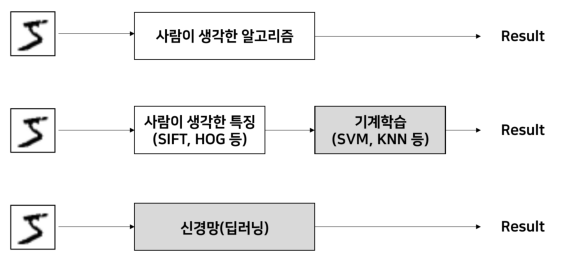

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = plt.imread('MachineLearningMethod.png')
plt.figure(figsize=(10, 10))
plt.axes().axis('off')
imgplot = plt.imshow(img)

#### 그림 1. 기계학습 접근법  
- 그림 1과 같이 신경망은 이미지를 있는 그대로 학습함
- 사람이 생각한 특징까지 스스로 학습하여 모델을 제시함

### 훈련 데이터와 시험 데이터
- 기계학습 문제는 데이터를 훈련 데이터(Training Data)와 시험 데이터(Test Data)로 나눠 학습과 실험을 수행하는 것이 일반적임
- 훈련 데이터를 통해 학습하면서 최적의 매개변수를 찾은 후, 시험 데이터를 사용하여 앞서 훈련한 모델의 성능을 평가함
- 그 이유로는 해당 분야에 범용적(일반적, Generalization)으로 사용할 수 있는 모델을 원하기 때문임
- 범용 능력은 아직 보지 못한 데이터(훈련, 시험 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력을 뜻함
- 범용 능력을 획득하는 것이 기계학습의 최종 목표임
- 한가지 데이터셋에만 지나치게 최적화된 상태를 오버피팅(과적합, Overfitting)이라고 함, 오버피팅을 회피하는 것이 기계학습의 중요한 과제이기도 함

## 손실 함수
- 신경망 학습에서 사용하는 지표는 손실 함수(Loss Function)라고 함
- 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차(Mean Squre Error)와 엔트로피 오차(Entropy Error)를 사용함
- 참고로 손실 함수는 신경망 성능의 나쁨을 나타내는 지표로, 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하냐를 표현하는 지표임

### 평균 제곱 오차
- 가장 많이 쓰이는 손실 함수는 평균 제곱 오차(MSE, Mean Squre Error)임

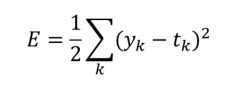

In [4]:
img = plt.imread('MSE_Formula.png')
plt.figure(figsize=(4, 4))
plt.axes().axis('off')
imgplot = plt.imshow(img)

- 여기서 y_k는 신경망의 출력(신경망이 추정한 값), t_k는 정답 레이블, k는 데이터의 차원 수를 뜻함

In [11]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 1부터 9까지 원-핫 인코딩(One-Hot Encoding)으로 정의
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [12]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [13]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

- 첫번째 예시는 정답이 '2'고 신경망의 출력도 '2'에서 가장 높은 경우로, MSE 값을 통해 오차가 작은 것을 확인할 수 있음
- 두번째 예시는 정답이 '2'고 신경망의 출력도 '7'에서 가장 높음 하지만, MSE 값이 높음
- 따라서 첫번째 예시가  MSE가 가장 낮기에 2로 출력한 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단이 가능함

### 교차 엔트로피 오차
- 또 다른 손실 함수로서 교차 엔트로피 오차(CEE, Cross Entropy Error)도 자주 이용됨

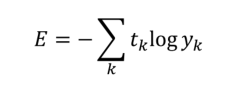

In [14]:
img = plt.imread('CEE_Formula.png')
plt.figure(figsize=(4, 4))
plt.axes().axis('off')
imgplot = plt.imshow(img)

- 여기서 log는 밑이 e인 자연로그임
- y_k는 신경망의 출력, t_k(원-핫 인코딩)는 정답 레이블임
- 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨
- 자연로그의 그래프는 x가 1일 때 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아짐

In [15]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# 1부터 9까지 원-핫 인코딩(One-Hot Encoding)으로 정의
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [16]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [17]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

- 첫 번째 예시의 결과는 정답일 때의 출력으로, CEE는 0.51인 것을 확인할 수 있음
- 두 번째 예시의 결과로, CEE가 2.30인 것을 확인할 수 있음
- 즉, 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 적용해본 MSE의 판단과 일치한다는 것을 알 수 있음

### 미니배치 학습
- 기계학습은 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냄
- 이를 위해서는 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야함
- 즉, 훈련 데이터가 100개가 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것임

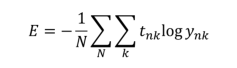

In [18]:
img = plt.imread('CEE_Formula_Total.png')
plt.figure(figsize=(4, 4))
plt.axes().axis('off')
imgplot = plt.imshow(img)

- 데이터가 N개라면 t_nk는 n번째 데이터의 k차원 째의 값, y_nk는 신경망의 출력, t_nk는 정답 레이블임
- 적용하려는 MNIST 데이터셋은 훈련 데이터가 총 60,000개로, 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸림
- 이런 경우 데이터의 일부를 추려 전체의 '근사치'로 이용할 수 있음, 여기서 일부를 미니배치(Mini-Batch)라고 부름
- 예를 들어, 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장을 사용하여 학습하는 것을 뜻하며, 이러한 학습 방법을 미니배치 학습이라고 함

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


- 첫번째 결과(60000, 784)를 통해 x^2 = 784, x = 28로, 28x28 크기의 이미지임을 알 수 있으며, 총 60,000개의 훈련 데이터로 구성되어있는 것을 알 수 있음
- 두번째 결과(60000, 10)를 통해 60,000개의 데이터의 레이블은 10차원(0~9)인 것을 알 수 있음

In [22]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = t_train[batch_mask]

- np.random.choice()를 통해 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있음

In [23]:
np.random.choice(60000, 10)

array([44277, 47520, 30793, 51055, 20608, 55584,  1544, 31786, 58406,
       33429])

### (배치용) 교차 엔트로피 오차 구현하기

In [24]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

- y는 신경망의 출력, t는 정답 레이블임
- 데이터 하나당 CEE를 구하는 경우에 reshape 함수로 데이터의 형상을 바꾼 뒤, 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산함

In [25]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size), t])) / batch_size

- 정답 레이블 t가 원-핫 인코딩일 때, t가 0인 원소는 CEE도 0이므로 그 계산은 무시해도 좋다고 정의하였음
- 즉, 정답에 해당하는 신경망의 출력만으로 CEE를 계산이 가능함

### 왜 손실 함수를 설정하는가?
- 우리의 궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것임
- 하지만, 정확도라는 지표가 있는데 왜 굳이 중간에 손실 함수의 값을 거치는 것일까?
- 이는 신경망 학습에서의 '미분'의 역할에 주목해야함
- 신경망 학습과정에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음
- 이때 매개변수의 미분(기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복함
- 정확도를 성능 지표로 삼아서 안되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문임
- 이는 활성화 함수로 계단 함수를 잘 활용하지 않는 이유와 유사함

## 수치 미분  
### 미분

In [26]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) /(2*h)

- 아주 작은 차분으로 미분을 구하는 것을 수치 미분이라 함  

### 수치 미분의 예  
- 2차 함수 y = 0.001x^2 + 0.1x 를 파이썬으로 구현하면 다음과 같음

In [27]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

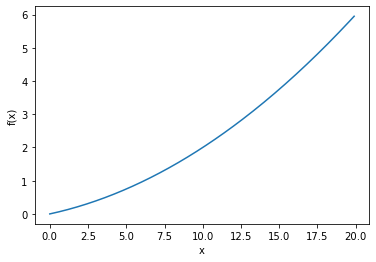

In [28]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1간격의 배열 x 생성
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

#### 그림 2. 수치 미분 결과 그래프

In [29]:
numerical_diff(function_1, 5)

0.1999999999990898

In [30]:
numerical_diff(function_1, 10)

0.2999999999986347

- 결과는 함수의 기울기, 즉 x에 대한 f(x)의 변화량임
- 기존 2차 함수의 미분 값은 0.02x+1 로 x가 5일 때 0.2, 10일 때, 0.3으로 수치 미분 결과와 비교하면 그 오차가 매우 작음을 알 수 있음

### 편미분  

In [31]:
def function_2(x):
    return x[0]**2 + x[1]**2
# return np.sum(x**2)로도 가능

- 변수가 여럿인 함수에 대한 미분을 편미분이라고 함

In [33]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [35]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 해석적 미분 결과와 거의 같은 것을 확인할 수 있음

### 기울기  
- 모든 변수의 편미분을 벡토로 정리한 것을 기울기(Gradient)라고 함

In [36]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [37]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

No handles with labels found to put in legend.


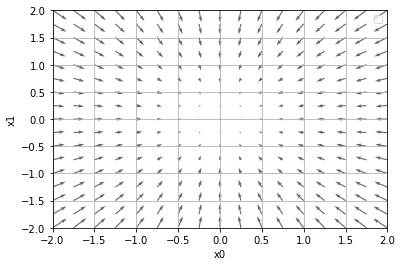

In [43]:
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

#### 그림 3. 편미분 결과 그래프  
- 그림과 같이 방향을 가진 벡터로 그려지며, 기울기는 함수의 가장 낮은 장소(최솟값)을 가리키고 있음
- 아울러, '가장 낮은 곳'에서 멀어질수록 화살표의 크기가 커짐을 알 수 있음
- 기울기가 가리키는 쪽은 *각 장소에서 함수의 출력 값을 가장 줄이는 방향임*

### 경사법(경사 하강법)
- 기계학습 문제의 대부분은 학습 단계에서 최적의 매개변수를 찾아내야함
- 여기서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값을 뜻함
- 하지만 일반적인 문제의 손실 함수는 매우 복잡함, 그 이유로 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 알아내기 힘듦
- 이런 상황에서 기울기를 활용하여 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 경사하강법임
- 경사 하강법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하며, 이동한 곳에서 기울기를 구하고 또 기울어진 방향으로 나아가는 일을 반복하여 함수의 값을 점차 줄임
- 경사 하강법은 기계학습의 최적화 문제에서 흔히 쓰는 방법으로, 신경망 학습에는 많이 사용함
- 최솟값을 찾을 경우, 경사 하강법(Gradient Descent Method) 최댓값을 찾을 경우 경사 상승법(Gradient Ascent Method)라고 칭함

#### 학습률  
- 학습률(Learning Rate)이란 한 번의 학습으로 얼마만큼 학습해야 할지 정의하는 값임
- 즉, 매개변수 값을 얼마나 갱신하느냐를 정하는 것임
- 일반적으로 학습률의 값이 너무 크면 발산해버리거나, 너무 작으면 갱신되지 않음
- 학습률과 같이 사람이 직접 설정해야하는 매개변수를 하이퍼파라미터(초매개변수, Hyper Parameter)라고 칭함, 일반적으로 하이퍼파라미터는 여러 후보 값 중에서 실험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 함

## 학습 알고리즘 구현하기  
- 전제 : 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 함
- 1단계 - 미니배치 : 훈련 데이터 중 일부를 무작위로 가져오며(미니배치), 미니배치의 손실함수 값을 줄이는 것을 목표로 함
- 2단계 - 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함, 기울기는 손실 함수 값을 가장 작게 하는 방향을 제시함
- 3단계 - 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신함
- 4단계 - 반복 : 1 ~ 3단계를 반복함

- **위의 과정은 신경망 학습이 이뤄지는 순서로 경사하강법으로 매개변수를 갱신하는 과정임, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(SGD, Stochastic Gradient Descent)라고 칭함**

### 2층 신경망 클래스 구현하기  
- 에폭(Epoch)은 하나의 단위로, 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당함
- 예를 들어, 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 **소진**한 게 됨
- 이 경우 100회가 1에폭임  

  

- **two_layer_net.py(2층 신경망 클래스 구현)**  

In [53]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

- **train_neuralnet.py (미니배치 학습 구현)**

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7864, 0.7952
train acc, test acc | 0.8759666666666667, 0.8828
train acc, test acc | 0.8991666666666667, 0.9022
train acc, test acc | 0.9092833333333333, 0.9133
train acc, test acc | 0.91585, 0.9176
train acc, test acc | 0.9210666666666667, 0.9216
train acc, test acc | 0.9263666666666667, 0.9275
train acc, test acc | 0.9290333333333334, 0.9314
train acc, test acc | 0.9325166666666667, 0.9338
train acc, test acc | 0.9354833333333333, 0.9367
train acc, test acc | 0.93845, 0.9391
train acc, test acc | 0.9412833333333334, 0.9405
train acc, test acc | 0.9427333333333333, 0.9426
train acc, test acc | 0.9444833333333333, 0.9431
train acc, test acc | 0.9465, 0.9452
train acc, test acc | 0.9478333333333333, 0.9473


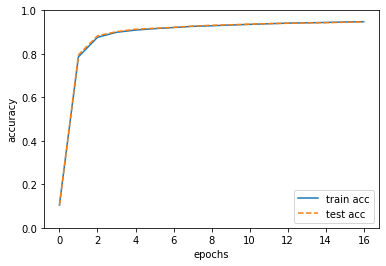

In [51]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- https://github.com/WegraLee/deep-learning-from-scratch 에서 two_layer_net.py 가져와 수행하였음
- 그림을 통해 학습이 진행될 수록 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 개선되는 것을 확인할 수 있음
- 아울러, 두 정확도의 차이가 거의 없는 것을 확인할 수 있는데, 오버피팅이 일어나지 않았다는 것을 알 수 있음

## 정리
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신함
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복함